In [1]:
# Load Libraries 
import pandas as pd                 
import numpy as np                   
import seaborn as sns                
import matplotlib.pyplot as plt   

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
         
import tensorflow as tf              

In [2]:
# Load the AUTO-MPG DATA AND CLEAN
data = pd.read_csv("auto-mpg.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [3]:
data.columns = data.columns.str.strip().str.lower()
data.columns = data.columns.str.replace(" ", "_")

In [4]:
data = data.replace("?", np.nan).dropna()

In [5]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [6]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

In [7]:
data_dsc = data.describe().T
data_dsc.iloc[:,1:3]

,mean,std
mpg,23.445918,7.805007
cylinders,5.471939,1.705783
displacement,194.411990,104.644004
weight,2977.584184,849.402560
acceleration,15.541327,2.758864
model_year,75.979592,3.683737
origin,1.576531,0.805518


In [8]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [9]:
data.iloc[:,0:-1].corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [10]:
data.apply(np.isreal)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
393,True,True,True,True,True,True,True,True,True
394,True,True,True,True,True,True,True,True,True
395,True,True,True,True,True,True,True,True,True
396,True,True,True,True,True,True,True,True,True


In [11]:
for (index,row) in data["origin"].items():
    if type(row):
        print(row)
    # print(if type(row))
    # if type(row) != "float64":
    #     print(row)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
3
2
2
2
2
2
1
1
1
1
1
3
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
3
3
2
1
3
1
2
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
2
2
2
2
1
3
3
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
3
1
3
3
1
1
2
1
1
2
2
2
2
1
2
3
1
1
1
1
3
1
3
1
1
1
1
1
1
1
1
1
2
2
2
3
3
1
2
2
3
3
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
3
2
3
1
2
1
2
2
2
2
3
2
2
1
1
2
1
1
1
1
1
1
1
1
1
1
2
3
1
1
1
1
2
3
3
1
2
1
2
3
2
1
1
1
1
3
1
2
1
3
1
1
1
1
1
1
1
1
1
1
1
1
2
1
3
1
1
1
3
2
3
2
3
2
1
3
3
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
3
1
3
1
1
3
2
2
2
2
2
3
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
1
1
2
1
2
1
1
1
3
2
1
1
1
1
2
3
1
3
1
1
1
1
2
3
3
3
3
3
1
3
2
2
2
2
3
3
2
3
3
2
3
1
1
1
1
1
3
1
3
3
3
3
3
1
1
1
2
3
3
3
3
2
2
3
3
1
1
1
1
1
1
1
1
1
1
1
2
3
3
1
1
3
3
3
3
3
3
1
1
1
1
3
1
1
1
2
1
1
1


In [12]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [13]:
# data_num = data.iloc[:,0:-1]
# sns.pairplot(data=data_num)
# plt.show()

In [14]:
data.iloc[:,0].name

'mpg'

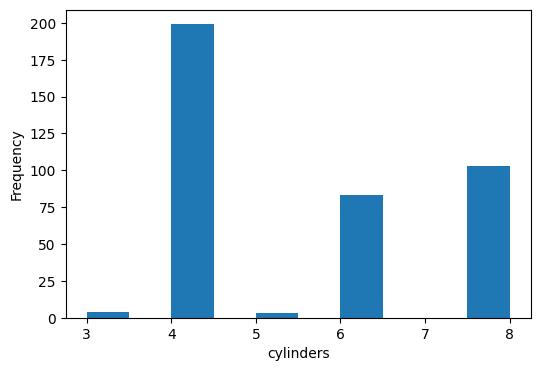

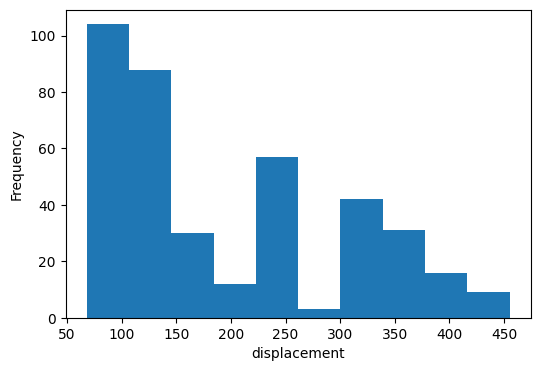

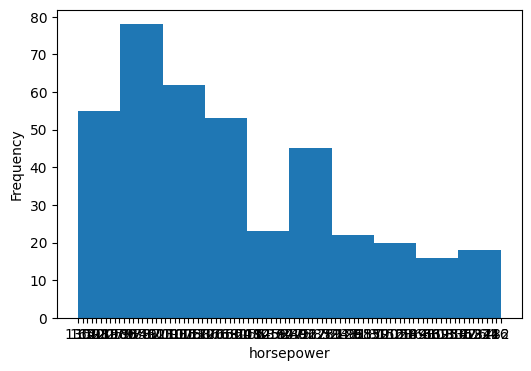

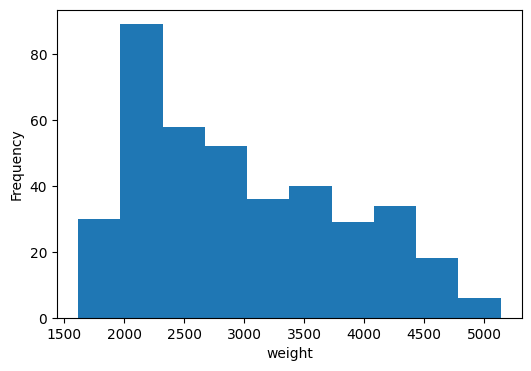

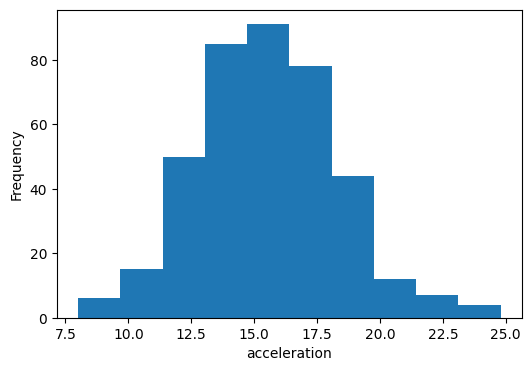

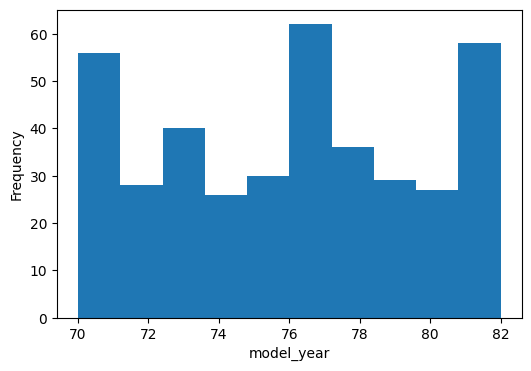

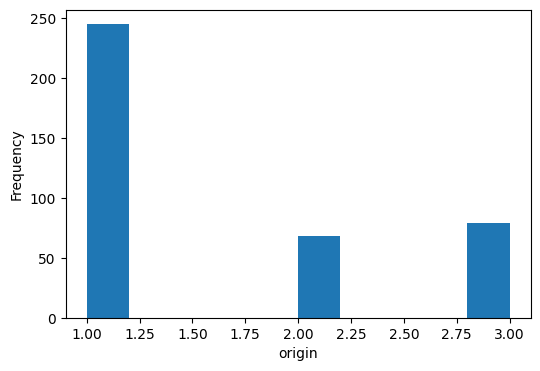

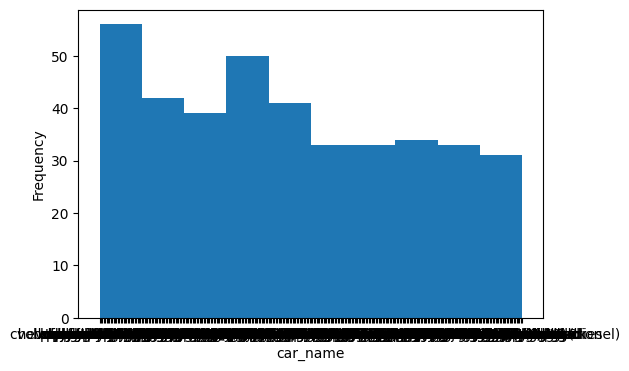

In [15]:
const_col_name = data.iloc[:,0].name

for column in data.columns:
    if column != const_col_name:
        plt.figure(figsize=(6,4))
        plt.hist(x=data[column], bins=10)
        plt.xlabel(f"{column}")
        plt.ylabel("Frequency")
        plt.show()

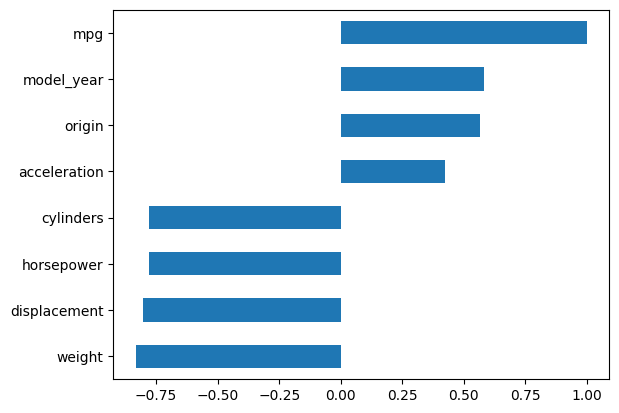

In [16]:
data_num = data.iloc[:,0:-1]
data_corr = data_num.astype("float").corr()
data_corr["mpg"].sort_values(ascending=True).plot(kind="barh")
plt.show()

# Fire-up the Data 🔥🧯

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 30.6+ KB


In [18]:
data["horsepower"] = data["horsepower"].astype("int")

In [19]:
data["car_name"].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'plymouth satellite custom', 'ford torino 500', 'amc matador',
       'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900', 'peugeot 304

In [20]:
for word in data["car_name"][0]:
    print(word)

c
h
e
v
r
o
l
e
t
 
c
h
e
v
e
l
l
e
 
m
a
l
i
b
u


In [21]:
data["car_name"][0].split()[0]

'chevrolet'

In [22]:
data["car_name"].str.split().str[1].unique()

array(['chevelle', 'skylark', 'satellite', 'rebel', 'torino', 'galaxie',
       'impala', 'fury', 'catalina', 'ambassador', 'challenger', "'cuda",
       'monte', 'estate', 'corona', 'duster', 'hornet', 'maverick',
       'pl510', '1131', '504', '100', '99e', '2002', 'gremlin', 'f250',
       'c20', 'd200', '1200d', 'vega', 'matador', 'monaco', 'country',
       'safari', 'firebird', 'mustang', 'capri', '1900', '304', '124b',
       'corolla', '1200', 'model', 'cricket', 'colt', 'type', 'pinto',
       'marquis', 'lesabre', 'delta', 'newport', 'rx2', 'gran', '145e',
       '411', '12', '510', 'century', 'malibu', 'coronet', 'caprice',
       'ltd', 'new', 'electra', 'valiant', 'nova', 'super', 'custom',
       'vista', 'carina', '610', 'rx3', '124', 'grand', '128', 'manta',
       '100ls', '144ea', 'dart', '99le', 'mark', 'omega', 'b210', 'fox',
       'dasher', '710', 'civic', nan, 'x1.9', 'monarch', 'bel', 'skyhawk',
       'monza', 'astro', 'rabbit', 'pacer', '244dl', '131', 'ii', '

In [23]:
data["car_maker"] = data["car_name"].str.split().str[0]
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,car_maker
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford


In [24]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data["car_maker_num"] = encoder.fit_transform(data["car_maker"])
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,car_maker,car_maker_num
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet,7
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick,3
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth,25
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford,13


<Axes: ylabel='Frequency'>

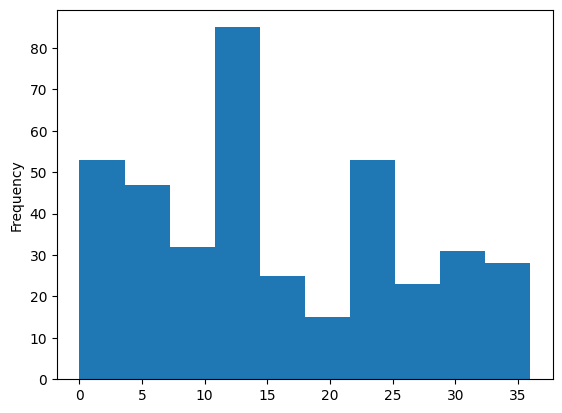

In [25]:
data["car_maker_num"].plot(kind="hist", bins=10)

In [26]:
data.shape

(392, 11)

In [103]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,car_maker,car_maker_num
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet,7
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick,3
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth,25
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford,13


In [104]:
pd.to_pickle(data, "mpg_cleaned.pkl")

# Build Tensorflow Model 🔥🧯

In [27]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,car_maker,car_maker_num
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet,7
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick,3
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth,25
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford,13


In [28]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name', 'car_maker',
       'car_maker_num'],
      dtype='object')

In [29]:
# Define X and y Variables 
X = data.loc[:,['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin','car_maker_num'
       ]].values
y = data["mpg"].values

# Print data shape

print(X.shape)
print(y.shape)

(392, 8)
(392,)


In [30]:
# Split data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the X dataframe
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print data shape 
print(f"X_train Shape: {X_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (313, 8)
X_test Shape: (79, 8)
y_train Shape: (313,)
y_test Shape: (79,)


In [31]:
print(len(X_train))

313


In [32]:
X_train.shape[1]

8

# Tensorflow - Deep Learning 🚀🚀

In [33]:
# Import Deep Learning Libraries

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras import models
from keras import layers

# libraries 
from tensorflow.keras import models, layers, losses, metrics, optimizers

In [34]:
# Build Basic Deep Learning Model with Keras
model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
model.add(layers.Dense(1, activation="linear"))

model.compile(optimizer="adam",
              loss=losses.MeanSquaredError(),
              metrics=[metrics.MeanAbsoluteError()])


model.fit(X_train, y_train, 
          batch_size=20, epochs=10,
          validation_data=(X_test, y_test),
          verbose=0
          )

c:\Users\Owner\apollo-v1-ML\apollo-v1-ML\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model_history = pd.DataFrame(model.history.history)
# model_history

In [36]:
model_history.columns

Index(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'], dtype='object')

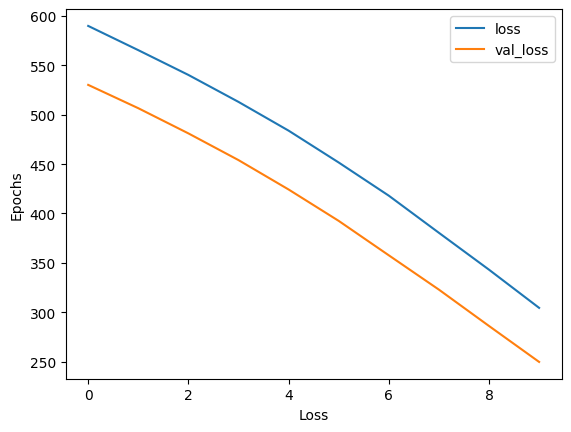

In [37]:
model_history.loc[:,['loss','val_loss']].plot(kind="line",
                                              xlabel="Loss",
                                              ylabel="Epochs")
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


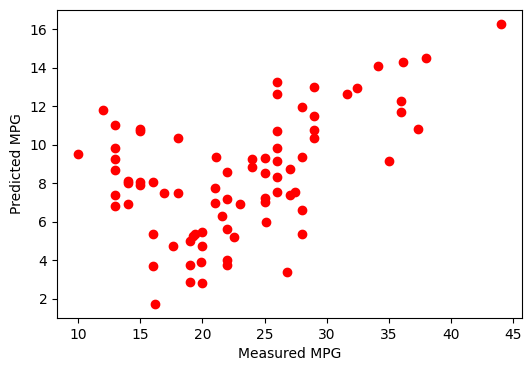

In [38]:
# Make predictions 
y_predict = model.predict(X_test)
# Metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model Metrics
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r_squred = r2_score(y_test, y_predict)

# Print Metrics
metrics = { 
           "MSE": round(mse, 3),
           "MAE": round(mae, 3),
           "R-squared" : round(r_squred, 3)
            }

# Plot the data
plt.figure(figsize=(6,4))
plt.scatter(x=y_test.flatten(), y=y_predict, color="red")
plt.xlabel("Measured MPG")
plt.ylabel("Predicted MPG")
plt.show()


In [39]:
print(metrics)

{'MSE': 249.647, 'MAE': 14.529, 'R-squared': -3.891}


# Deep Layers 🔥🚀

In [45]:
import tensorflow
from tensorflow.keras import metrics, layers, losses
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [ ]:
# Build Basic Deep Learning Model with Keras
model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(16, activation="relu"))  
# model.add(layers.Dense(8, activation="relu")) 
# model.add(layers.Dense(4, activation="relu"))
# model.add(layers.Dense(2, activation="relu"))
model.add(layers.Dense(1, activation="linear"))

optimizer = optimizers.Adam(learning_rate=0.001)

model.compile(optimizer="adam",
              loss="mse",
              metrics=["mae"]
              )

model.fit(X_train, 
          y_train, 
          batch_size=25, 
          epochs=300,
          validation_data=(X_test, y_test),
          verbose=0
          )

c:\Users\Owner\apollo-v1-ML\apollo-v1-ML\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


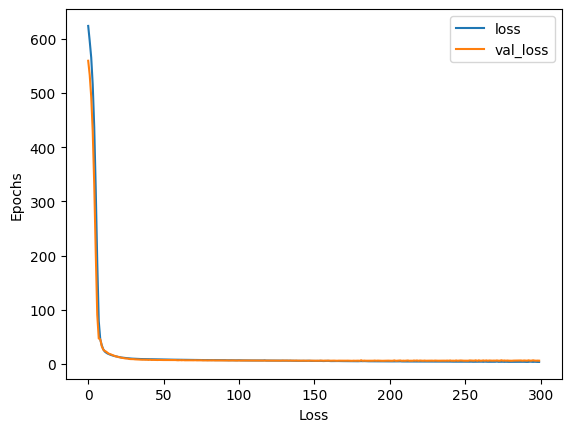

In [47]:
model_history = pd.DataFrame(model.history.history)

model_history.loc[:,['loss','val_loss']].plot(kind="line",
                                              xlabel="Loss",
                                              ylabel="Epochs")
plt.show()

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001AAB5BA31A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
{'MSE': 5.801, 'MAE': 1.765, 'R-squared': 0.886}


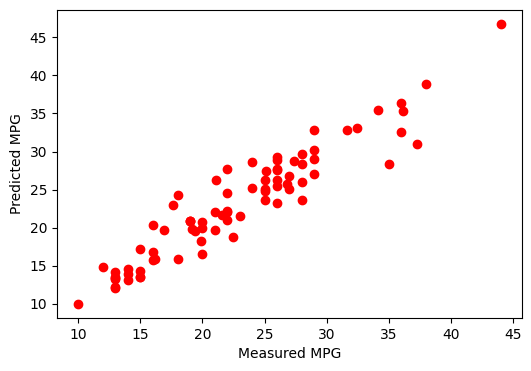

In [48]:
# Make predictions 
y_predict = model.predict(X_test)
# Metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model Metrics
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r_squred = r2_score(y_test, y_predict)

# Print Metrics
metrics = { 
           "MSE": round(mse, 3),
           "MAE": round(mae, 3),
           "R-squared" : round(r_squred, 3)
            }

print(metrics)

# Plot the data
plt.figure(figsize=(6,4))
plt.scatter(x=y_test.flatten(), y=y_predict, color="red")
plt.xlabel("Measured MPG")
plt.ylabel("Predicted MPG")
plt.show()


In [44]:
# {'MSE': 6.983, 'MAE': 1.961, 'R-squared': 0.863}

# D-Learning - CALLBACKS 🔨🛠️🪚

In [50]:
# Build Basic Deep Learning Model with Keras
from tensorflow.keras.callbacks import EarlyStopping

model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(16, activation="relu"))  
model.add(layers.Dense(1, activation="linear"))

optimizer = optimizers.Adam(learning_rate=0.001)

model.compile(optimizer="adam",
              loss="mse",
              metrics=["mae"]
              )

call_backs = EarlyStopping(
                            monitor="val_loss",
                            patience=10,
                            mode="min",
                            restore_best_weights=True
                            )

model.fit(X_train, 
          y_train, 
          batch_size=25, 
          epochs=300,
          validation_data=(X_test, y_test),
          callbacks=[call_backs],
          verbose=0
          )

c:\Users\Owner\apollo-v1-ML\apollo-v1-ML\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


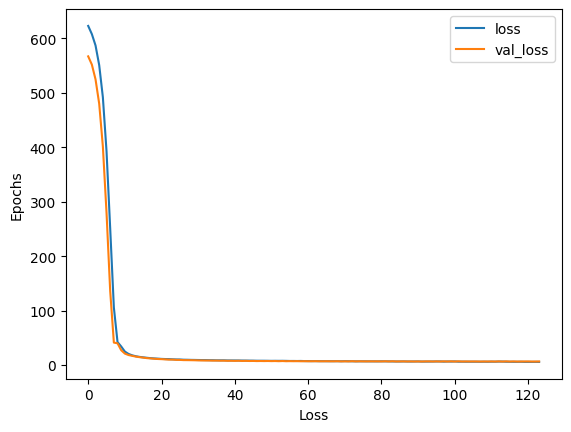

In [51]:
model_history = pd.DataFrame(model.history.history)

model_history.loc[:,['loss','val_loss']].plot(kind="line",
                                              xlabel="Loss",
                                              ylabel="Epochs")
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
{'MSE': 6.46, 'MAE': 1.798, 'R-squared': 0.873}


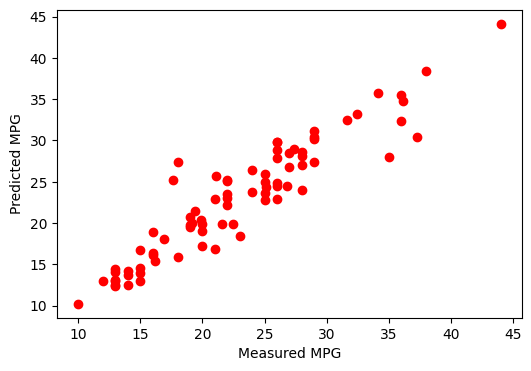

In [52]:
# Make predictions 
y_predict = model.predict(X_test)
# Metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model Metrics
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r_squred = r2_score(y_test, y_predict)

# Print Metrics
metrics = { 
           "MSE": round(mse, 3),
           "MAE": round(mae, 3),
           "R-squared" : round(r_squred, 3)
            }

print(metrics)

# Plot the data
plt.figure(figsize=(6,4))
plt.scatter(x=y_test.flatten(), y=y_predict, color="red")
plt.xlabel("Measured MPG")
plt.ylabel("Predicted MPG")
plt.show()


# DropOut DLearning 🐙🕷️

In [54]:
from tensorflow.keras.layers import Dropout

model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
Dropout(0.25)
model.add(layers.Dense(32, activation="relu"))
Dropout(0.25)
model.add(layers.Dense(16, activation="relu")) 
Dropout(0.5) 
model.add(layers.Dense(1, activation="linear"))

optimizer = optimizers.Adam(learning_rate=0.001)

model.compile(optimizer="adam",
              loss="mse",
              metrics=["mae"]
              )

call_backs = EarlyStopping(
                            monitor="val_loss",
                            patience=10,
                            mode="min",
                            restore_best_weights=True
                            )

model.fit(X_train, 
          y_train, 
          batch_size=25, 
          epochs=300,
          validation_data=(X_test, y_test),
          callbacks=[call_backs],
          verbose=0
          )

c:\Users\Owner\apollo-v1-ML\apollo-v1-ML\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


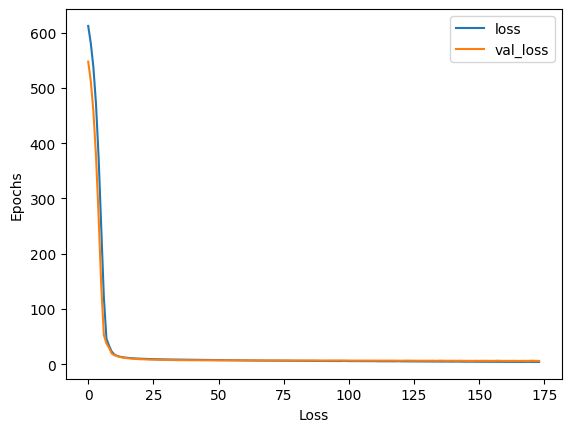

In [55]:
model_history = pd.DataFrame(model.history.history)

model_history.loc[:,['loss','val_loss']].plot(kind="line",
                                              xlabel="Loss",
                                              ylabel="Epochs")
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step
{'MSE': 6.0, 'MAE': 1.758, 'R-squared': 0.882}


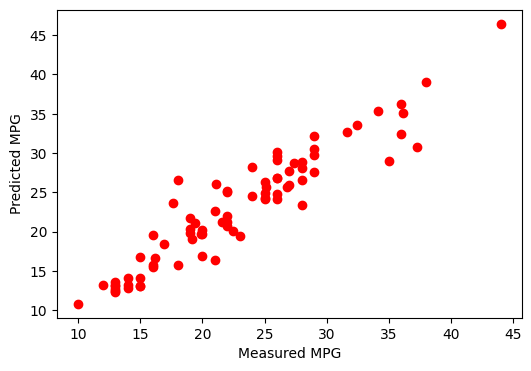

In [56]:
# Make predictions 
y_predict = model.predict(X_test)
# Metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model Metrics
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r_squred = r2_score(y_test, y_predict)

# Print Metrics
metrics = { 
           "MSE": round(mse, 3),
           "MAE": round(mae, 3),
           "R-squared" : round(r_squred, 3)
            }

print(metrics)

# Plot the data
plt.figure(figsize=(6,4))
plt.scatter(x=y_test.flatten(), y=y_predict, color="red")
plt.xlabel("Measured MPG")
plt.ylabel("Predicted MPG")
plt.show()


In [57]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 5.9997 - mae: 1.7579 
Test accuracy: 1.7578907012939453


# Regularization 🕷️✅

In [60]:
from tensorflow.keras.regularizers import l1,l2

model = models.Sequential()
model.add(layers.Dense(64, activation="relu", kernel_regularizer=l1(0.01), input_shape=(X_train.shape[1],)))
Dropout(0.25)
model.add(layers.Dense(32, activation="relu",kernel_regularizer=l1(0.01)))
Dropout(0.25)
model.add(layers.Dense(16, activation="relu",kernel_regularizer=l1(0.01)))
Dropout(0.5) 
model.add(layers.Dense(1, activation="linear"))

optimizer = optimizers.Adam(learning_rate=0.001)

model.compile(optimizer="adam",
              loss="mse",
              metrics=["mae"]
              )

call_backs = EarlyStopping(
                            monitor="val_loss",
                            patience=10,
                            mode="min",
                            restore_best_weights=True
                            )

model.fit(X_train, 
          y_train, 
          batch_size=25, 
          epochs=300,
          validation_data=(X_test, y_test),
          callbacks=[call_backs],
          verbose=0
          )


c:\Users\Owner\apollo-v1-ML\apollo-v1-ML\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


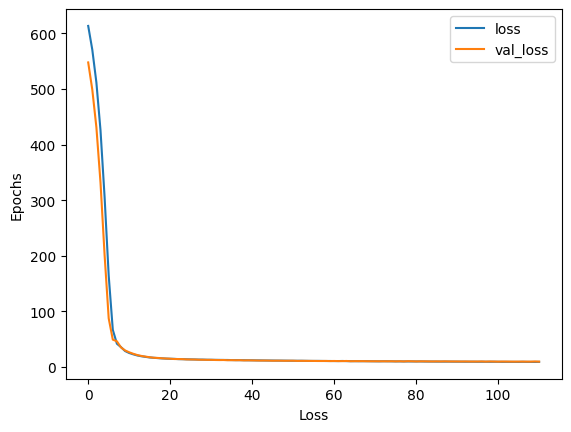

In [61]:
model_history = pd.DataFrame(model.history.history)

model_history.loc[:,['loss','val_loss']].plot(kind="line",
                                              xlabel="Loss",
                                              ylabel="Epochs")
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
{'MSE': 6.525, 'MAE': 1.839, 'R-squared': 0.872}


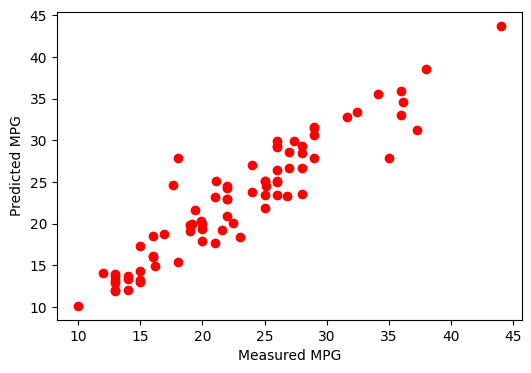

In [62]:
# Make predictions 
y_predict = model.predict(X_test)
# Metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model Metrics
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r_squred = r2_score(y_test, y_predict)

# Print Metrics
metrics = { 
           "MSE": round(mse, 3),
           "MAE": round(mae, 3),
           "R-squared" : round(r_squred, 3)
            }

print(metrics)

# Plot the data
plt.figure(figsize=(6,4))
plt.scatter(x=y_test.flatten(), y=y_predict, color="red")
plt.xlabel("Measured MPG")
plt.ylabel("Predicted MPG")
plt.show()


# Combine Regularization

In [83]:
from tensorflow.keras.regularizers import l1,l2

model = models.Sequential()
model.add(layers.Dense(64, activation="relu", kernel_regularizer=l1(0.01), input_shape=(X_train.shape[1],)))
Dropout(0.25)
model.add(layers.Dense(32, activation="relu",kernel_regularizer=l1(0.01)))
Dropout(0.25)
model.add(layers.Dense(16, activation="relu",kernel_regularizer=l1(0.01)))
Dropout(0.5) 
model.add(layers.Dense(1, activation="linear"))

optimizer = optimizers.Adam(learning_rate=0.001)

model.compile(optimizer="adam",
              loss="mse",
              metrics=["mae"]
              )

call_backs = EarlyStopping(
                            monitor="val_loss",
                            patience=10,
                            mode="min",
                            restore_best_weights=True
                            )

call_backs = EarlyStopping(
                            monitor="val_loss",
                            patience=10,
                            mode="min",
                            restore_best_weights=True
                            )

model.fit(X_train, 
          y_train, 
          batch_size=25, 
          epochs=300,
          validation_data=(X_test, y_test),
          callbacks=[call_backs],
          verbose=0
          )


c:\Users\Owner\apollo-v1-ML\apollo-v1-ML\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


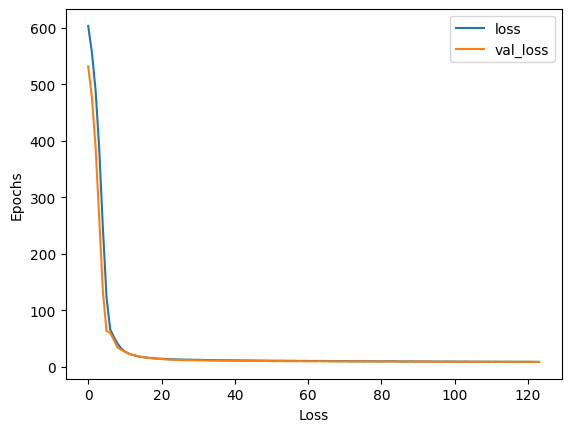

In [84]:
model_history = pd.DataFrame(model.history.history)

model_history.loc[:,['loss','val_loss']].plot(kind="line",
                                              xlabel="Loss",
                                              ylabel="Epochs")
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
{'MSE': 5.852, 'MAE': 1.699, 'R-squared': 0.885}


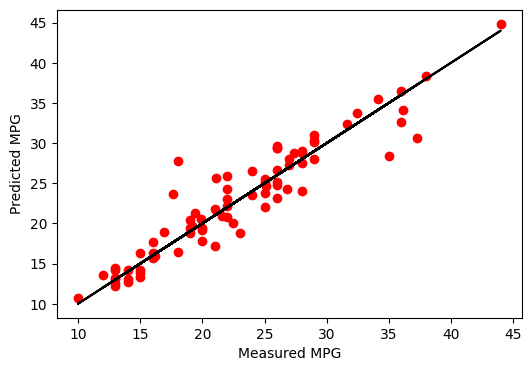

In [85]:
# Make predictions 
y_predict = model.predict(X_test)
# Metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model Metrics
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r_squred = r2_score(y_test, y_predict)

# Print Metrics
metrics = { 
           "MSE": round(mse, 3),
           "MAE": round(mae, 3),
           "R-squared" : round(r_squred, 3)
            }

print(metrics)

# Plot the data
plt.figure(figsize=(6,4))
plt.scatter(x=y_test.flatten(), y=y_predict, color="red")
plt.plot(y_test, y_test, color="black")
plt.xlabel("Measured MPG")
plt.ylabel("Predicted MPG")
plt.show()

In [90]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Loss is: {loss:.2f}")
print(f"MAE values is: {mae:.2f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 9.0877 - mae: 1.6990 
Loss is: 9.09
MAE values is: 1.70


# Change Model Config 🕷️❌

In [75]:
# Build Basic Deep Learning Model with Keras
model1 = models.Sequential()
model1.add(layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
model1.add(layers.Dense(32, activation="relu"))
# model1.add(layers.Dense(16, activation="relu"))  
# model1.add(layers.Dense(8, activation="relu")) 
# model.add(layers.Dense(4, activation="relu"))
# model.add(layers.Dense(2, activation="relu"))
model1.add(layers.Dense(1, activation="linear"))

optimizer = optimizers.Adam(learning_rate=0.001) # default learning rate of Adam optimizer

model1.compile(optimizer="adam",
              loss="mse",
              metrics=["mae"]
              )

model1.fit(X_train, 
          y_train, 
          batch_size=15, 
          epochs=200,
          validation_data=(X_test, y_test),
          verbose=0
          )

c:\Users\Owner\apollo-v1-ML\apollo-v1-ML\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
{'MSE': 6.688, 'MAE': 1.896, 'R-squared': 0.869}


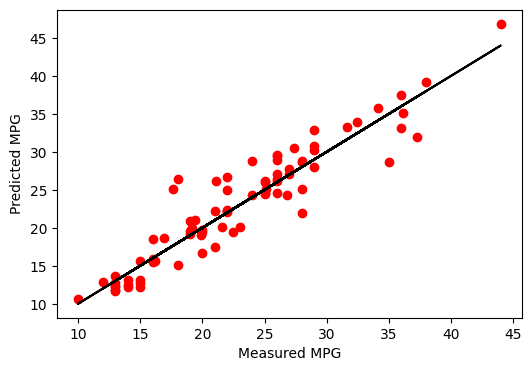

In [76]:
# Make predictions 
y_predict = model1.predict(X_test)

# Metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model Metrics
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r_squred = r2_score(y_test, y_predict)

# Print Metrics
metrics = { 
           "MSE": round(mse, 3),
           "MAE": round(mae, 3),
           "R-squared" : round(r_squred, 3)
            }

print(metrics)

# Plot the data
plt.figure(figsize=(6,4))
plt.scatter(x=y_test.flatten(), y=y_predict, color="red")
plt.plot(y_test, y_test, color="black")
plt.xlabel("Measured MPG")
plt.ylabel("Predicted MPG")
plt.show()

In [97]:
from tensorflow.keras import models, layers, optimizers, losses, metrics

batch_errors = []

for batch_size in range(1, 51):
    # Build a fresh model each iteration
    model = models.Sequential()
    model.add(layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(1, activation="linear"))
    
    model.compile(optimizer="adam",
                  loss="mse",
                  metrics=["mae"])
    
    model.fit(X_train, 
            y_train, 
            batch_size=batch_size, 
            epochs=20,       # maybe reduce for speed
            validation_data=(X_test, y_test),
            verbose=0
            )
    
    # Evaluate on validation set
    val_loss, val_mae = model.evaluate(X_test, y_test)
    
    # Save results
    batch_errors.append((batch_size, val_loss, val_mae))

# Convert results into a DataFrame for inspection
import pandas as pd
results_df = pd.DataFrame(batch_errors, columns=["batch_size", "val_loss", "val_mae"])

print(results_df.sort_values("val_loss").head())


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.1830 - mae: 1.8642 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.9923 - mae: 2.0195
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.5311 - mae: 2.1195
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 11.1085 - mae: 2.5763
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 13.3341 - mae: 2.9044
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 15.2879 - mae: 3.0614
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 19.1232 - mae: 3.3809
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 21.6718 - mae: 3.7041
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 24.6591 - mae: 3.9884
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 29.9059 - mae: 4.2957
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 31.8580 - mae: 4.5068
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 34.3876 - mae: 4.6575
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 40.8339 - mae: 5.0644
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 35.0910 - mae: 4.5842
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 42.4

In [98]:
results_df.sort_values("val_loss")

,batch_size,val_loss,val_mae
0,1,7.183011,1.864168
1,2,7.992330,2.019452
2,3,8.531060,2.119495
3,4,11.108502,2.576272
4,5,13.334146,2.904417
5,6,15.287891,3.061439
6,7,19.123215,3.380871
7,8,21.671801,3.704129
8,9,24.659109,3.988420
9,10,29.905907,4.295728


# Change Optimizer 🕷️🚀

In [101]:
# Build Basic Deep Learning Model with Keras
model1 = models.Sequential()
model1.add(layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
model1.add(layers.Dense(32, activation="relu"))
# model1.add(layers.Dense(16, activation="relu"))  
# model1.add(layers.Dense(8, activation="relu")) 
# model.add(layers.Dense(4, activation="relu"))
# model.add(layers.Dense(2, activation="relu"))
model1.add(layers.Dense(1, activation="linear"))

optimizer = optimizers.Adam(learning_rate=0.001) # default learning rate of Adam optimizer

model1.compile(optimizer="adam",
              loss="mse",
              metrics=["mae"]
              )

model1.fit(X_train, 
          y_train, 
          batch_size=20, 
          epochs=200,
          validation_data=(X_test, y_test),
          verbose=0
          )

c:\Users\Owner\apollo-v1-ML\apollo-v1-ML\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
{'MSE': 5.86, 'MAE': 1.793, 'R-squared': 0.885}


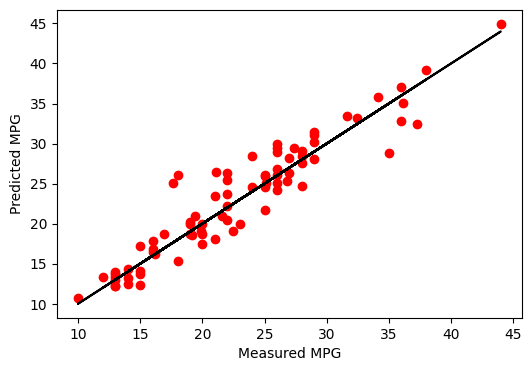

In [102]:
# Make predictions 
y_predict = model1.predict(X_test)

# Metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model Metrics
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r_squred = r2_score(y_test, y_predict)

# Print Metrics
metrics = { 
           "MSE": round(mse, 3),
           "MAE": round(mae, 3),
           "R-squared" : round(r_squred, 3)
            }

print(metrics)

# Plot the data
plt.figure(figsize=(6,4))
plt.scatter(x=y_test.flatten(), y=y_predict, color="red")
plt.plot(y_test, y_test, color="black")
plt.xlabel("Measured MPG")
plt.ylabel("Predicted MPG")
plt.show()